# Titanic Survival Prediction

This notebook contains Python programming to create a machine learning model to predict whether or not the passenger survived using attributes from the titanic dataset.

For that,We're going to approach in the following manner:
1. Problem definition
2. Data
3. Features
4. Modeling
5. Saving and loading trained machine learning models

## 1. Problem Definition

In a statement,
> Given attributes about a passenger, can we predict whether or not they have survived?

## 2. Data

The original data available on Kaggle. https://www.kaggle.com/datasets/brendan45774/test-file

## 3. Features

**Create data dictionary**

1. PassengerId - Passengers in order
2. Survived - (1 = Survived; 0 = Not Survived)
3. Pclass - Passenger class
    * 1: 1st class - Most expensive
    * 2: 2nd class - Middle class
    * 3: 3rd class -Least expensive
4. Name - Name of the passenger
5. Sex - Male , Female
6. Age - Age of the passenger
7. SibSp - Stands for Siblings/Spouses Aboard (Number of siblings or spouses a passenger had on board the titanic)
8. Parch - Stands for Parent/Children Aboard (Number of parents or children a passenger had on board the titanic)
9. Ticket - Ticket number assigned to passenger and can be used to identify groups of passengers traveling together(Multiple passengers could have same             ticket number if they were part of a group booking)
10. Fare - Amount of money a passenger paid for the ticket to board the titanic
11. Cabin - Cabin number or code assigned to passenger.This field provides information about where the passenger"s cabin was located (However not all               passengers have a cabin value because some passengers who were less likely to have private cabins)
12. Embarked - Indicates the port where a passenger boarded the titanic
    * S - Southampton
    * C - Cherbourg
    * Q - Queenstown

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("tested.csv")
df.shape #(Rows,Columns)

(418, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
#Let"s find out how many of each class there
df["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

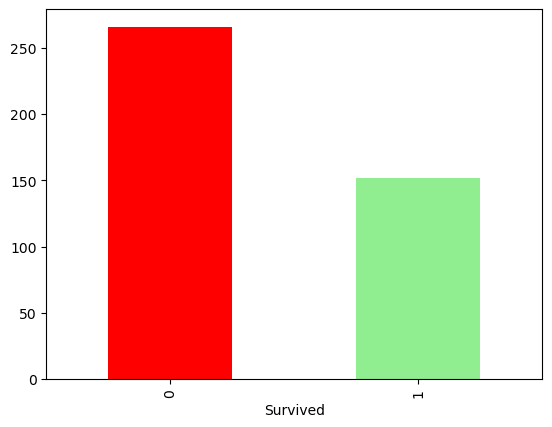

In [6]:
df["Survived"].value_counts().plot(kind= "bar",color= ["red","lightgreen"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#Are there any missing value ?
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Survived Frequency According to Sex

In [10]:
df.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [11]:
#Compare survived column with sex column
pd.crosstab(df.Survived,df.Sex)

Sex,female,male
Survived,,
0,0,266
1,152,0


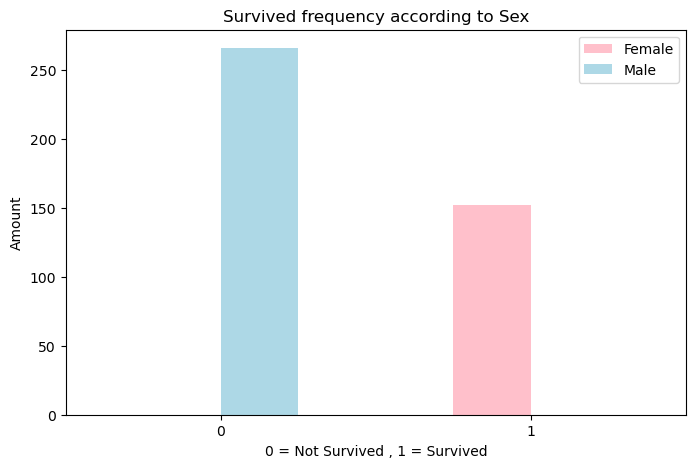

In [12]:
#Create a plot of crosstab
pd.crosstab(df.Survived,df.Sex).plot(kind="bar",
                                     figsize = (8,5),
                                     color=["pink","lightblue"])
plt.title("Survived frequency according to Sex")
plt.xlabel("0 = Not Survived , 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


### Survived Frequency per Embarked Type

12. Embarked - Indicates the port where a passenger boarded the titanic
    * S - Southampton
    * C - Cherbourg
    * Q - Queenstown


In [13]:
pd.crosstab(df.Embarked,df.Survived)

Survived,0,1
Embarked,,
C,62,40
Q,22,24
S,182,88


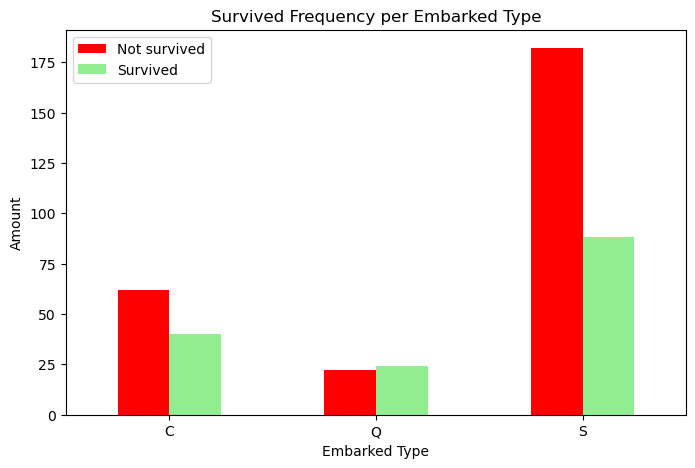

In [14]:
#Make the crosstab for more visuals
pd.crosstab(df.Embarked,df.Survived).plot(kind="bar",
                                         figsize=(8,5),
                                         color=["red","lightgreen"])
#Add some communication
plt.title("Survived Frequency per Embarked Type")
plt.xlabel("Embarked Type")
plt.ylabel("Amount")
plt.legend(["Not survived","Survived"])
plt.xticks(rotation=0);

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
#Drop unnecessary column for prediction
nd = df.drop(["Name"],axis=1)
nd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
#Change Sex values to integers
nd["Sex"] = np.where(nd["Sex"]=="female",0,1)
nd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,0,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int32  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 34.4+ KB


In [20]:
pd.api.types.is_string_dtype(nd["Ticket"])

True

In [21]:
# Find the columns which contain strings
for label, content in nd.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Ticket
Embarked


In [22]:
# This will turn all of the string value into category values
for label, content in nd.items():
    if pd.api.types.is_string_dtype(content):
        nd[label] = content.astype("category").cat.as_ordered()

In [23]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    int64   
 2   Pclass       418 non-null    int64   
 3   Sex          418 non-null    int32   
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(2), float64(2), int32(1), int64(5), object(1)
memory usage: 40.2+ KB


In [24]:
pd.api.types.is_string_dtype(nd["Cabin"])

False

In [25]:
#Manually Changing Cabin content
nd["Cabin"] = nd["Cabin"].astype("category").cat.as_ordered()

In [26]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    int64   
 2   Pclass       418 non-null    int64   
 3   Sex          418 non-null    int32   
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     category
 10  Embarked     418 non-null    category
dtypes: category(3), float64(2), int32(1), int64(5)
memory usage: 40.0 KB


In [27]:
# Check missing data
nd.isnull().sum()/len(nd)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [28]:
# Export current tmp dataframe
nd.to_csv("train_tmp.csv",
              index=False)

In [29]:
# Import preprocessed data
nd = pd.read_csv("train_tmp.csv",
                     low_memory=False)
nd.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Survived,0,1,0,0,1
Pclass,3,3,2,3,3
Sex,1,0,1,1,0
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [30]:
nd.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Fill missing values 

### Fill numerical missing values first

In [31]:
for label, content in nd.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Sex
Age
SibSp
Parch
Fare


In [32]:
# Check for which numeric columns have null values
for label, content in nd.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
Fare


In [33]:
# Fill numeric rows with the median
for label, content in nd.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            nd[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            nd[label] = content.fillna(content.median())

In [34]:
# Check if there's any null numeric values
for label, content in nd.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [35]:
nd.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
Age_is_missing       0
Fare_is_missing      0
dtype: int64

### Filling and turning categorical variables into numbers

In [36]:
# Check for columns which aren't numeric
for label, content in nd.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Ticket
Cabin
Embarked


In [37]:
# Turn categorical variables into numbers and fill missing
for label, content in nd.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        nd[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        nd[label] = pd.Categorical(content).codes+1

In [38]:
pd.Categorical(nd["Cabin"]).codes+1

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 14,  1, 62,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 17,  1, 12,  1,  4,  1,  1,  1,  1,  1,
       43,  1,  1,  1,  1,  1,  1, 57,  1,  1, 52,  1,  7,  1, 51,  1, 32,
        1,  1, 30,  1,  1,  1, 73,  1, 19,  1,  1,  1,  1, 17,  1,  1,  1,
       37, 30,  1,  1,  1, 61, 27, 28,  1, 23,  1,  1,  1, 39,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 21,  1,  1,  1, 35,  1,  1,  1, 26,  1,
        1,  1,  1,  1,  1,  1,  1, 70,  1,  1,  5,  1, 39,  1,  1, 77, 40,
        1,  1,  1, 31,  1,  1,  1,  1,  1,  1,  1,  1, 36,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 17,  1,  1,  1, 66,  1,  1,  1, 38,  1,  1,
        1,  1,  1, 48,  1, 54,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 26, 76, 65,  1, 68, 56,  1, 18,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 63,  1,  1,  1,  1,  1, 41,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  9,  1,  1, 44,  1,  1,
        1, 75,  1,  1,  1

In [39]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Survived             418 non-null    int64  
 2   Pclass               418 non-null    int64  
 3   Sex                  418 non-null    int64  
 4   Age                  418 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    int16  
 8   Fare                 418 non-null    float64
 9   Cabin                418 non-null    int8   
 10  Embarked             418 non-null    int8   
 11  Age_is_missing       418 non-null    bool   
 12  Fare_is_missing      418 non-null    bool   
 13  Ticket_is_missing    418 non-null    bool   
 14  Cabin_is_missing     418 non-null    bool   
 15  Embarked_is_missing  418 non-null    boo

In [40]:
nd.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Survived,0,1,0,0,1
Pclass,3,3,2,3,3
Sex,1,0,1,1,0
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,153,222,74,148,139
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,0,0,0,0,0


In [41]:
nd.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_is_missing         0
Fare_is_missing        0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

"Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model."

In [42]:
nd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,0,3,1,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,1,3,0,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,0,2,1,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,0,3,1,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,1,3,0,22.0,1,1,139,12.2875,0,3,False,False,False,True,False


In [43]:
len(nd)

418

In [44]:
#Make correlation matrix
nd.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.031447,0.003818,0.043080,-0.012301,0.008633,0.023544,0.040699,0.007112,-0.022930,NaN,-0.006462,NaN
Survived,-0.023245,1.000000,-0.108615,-1.000000,0.008035,0.099943,0.159120,0.047663,0.192036,0.093996,-0.076281,-0.077171,-0.037018,NaN,-0.131464,NaN
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.467853,0.001087,0.018721,0.292088,-0.577313,-0.506023,0.227983,0.282681,0.042775,NaN,0.690579,NaN
Sex,0.023245,-1.000000,0.108615,1.000000,-0.008035,-0.099943,-0.159120,-0.047663,-0.192036,-0.093996,0.076281,0.077171,0.037018,NaN,0.131464,NaN
Age,-0.031447,0.008035,-0.467853,-0.008035,1.000000,-0.071197,-0.043731,-0.132918,0.342357,0.233774,-0.148051,-0.104261,0.119258,NaN,-0.378730,NaN
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.071197,1.000000,0.306895,0.025199,0.171912,0.042821,0.052708,-0.075810,-0.024459,NaN,-0.073067,NaN
Parch,0.043080,0.159120,0.018721,-0.159120,-0.043731,0.306895,1.000000,0.109888,0.230325,0.017033,0.054577,-0.010515,-0.019600,NaN,-0.037237,NaN
Ticket,-0.012301,0.047663,0.292088,-0.047663,-0.132918,0.025199,0.109888,1.000000,-0.019401,-0.198805,0.093672,0.076740,0.026470,NaN,0.212925,NaN
Fare,0.008633,0.192036,-0.577313,-0.192036,0.342357,0.171912,0.230325,-0.019401,1.000000,0.371570,-0.257624,-0.187581,-0.018543,NaN,-0.561038,NaN
Cabin,0.023544,0.093996,-0.506023,-0.093996,0.233774,0.042821,0.017033,-0.198805,0.371570,1.000000,-0.238288,-0.149250,-0.021721,NaN,-0.840815,NaN


(16.5, -0.5)

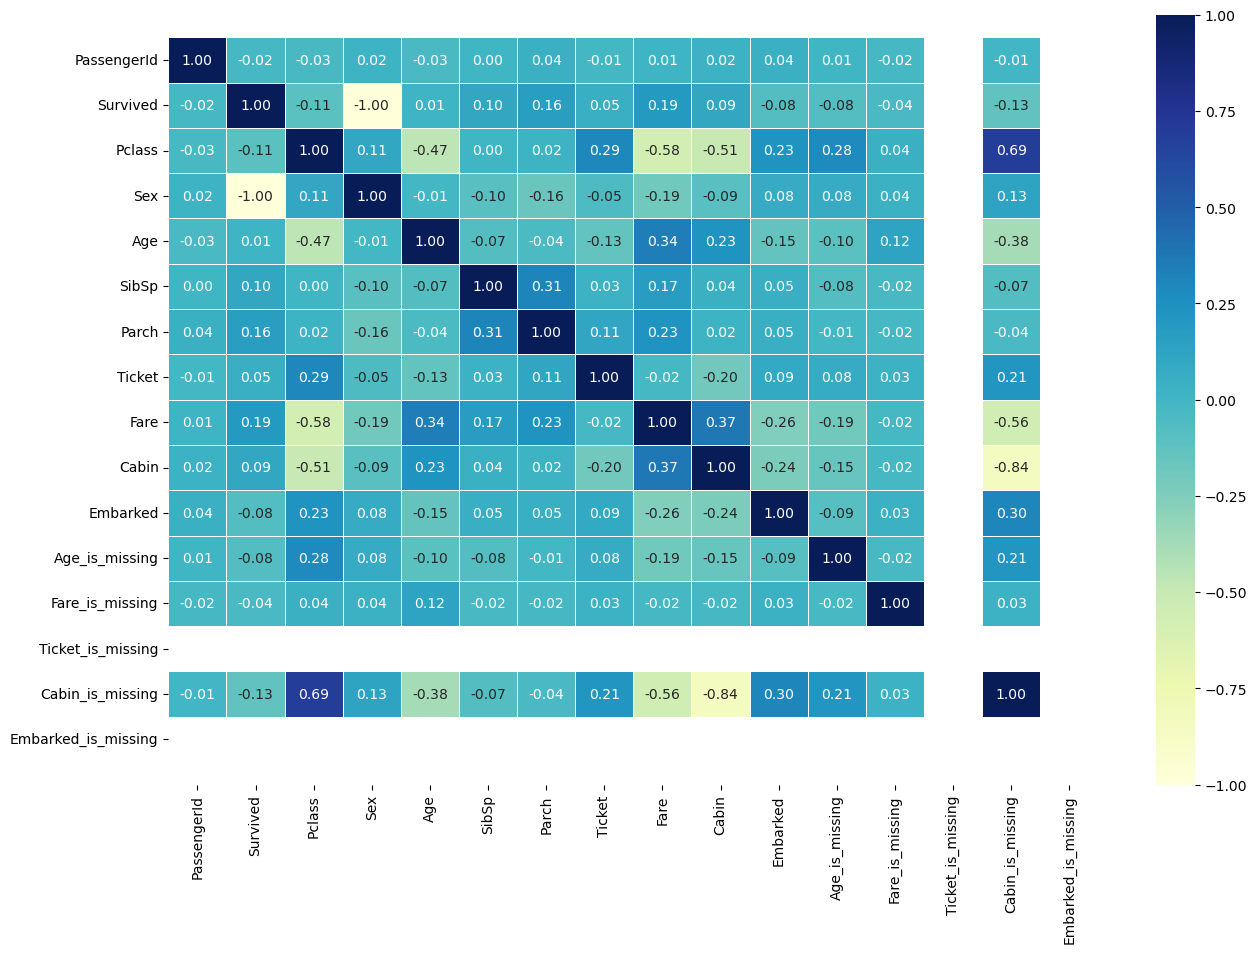

In [45]:
# Let's make our correlation matrix a little prettier
corr_matrix = nd.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 4. Modelling 

In [46]:
nd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,0,3,1,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,1,3,0,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,0,2,1,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,0,3,1,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,1,3,0,22.0,1,1,139,12.2875,0,3,False,False,False,True,False


In [47]:
# Split data into X and y
X = nd.drop("Survived", axis=1)

y = nd["Survived"]

In [48]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,1,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,3,0,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,2,1,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,3,1,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,3,0,22.0,1,1,139,12.2875,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,268,8.0500,0,3,True,False,False,True,False
414,1306,1,0,39.0,0,0,325,108.9000,23,1,False,False,False,False,False
415,1307,3,1,38.5,0,0,347,7.2500,0,3,False,False,False,True,False
416,1308,3,1,27.0,0,0,221,8.0500,0,3,True,False,False,True,False


In [49]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [50]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [51]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
336,1228,2,1,32.0,0,0,80,13.0000,0,3,False,False,False,True,False
31,923,2,1,24.0,2,0,284,31.5000,0,3,False,False,False,True,False
84,976,2,1,27.0,0,0,73,10.7083,0,2,True,False,False,True,False
287,1179,1,1,24.0,1,0,53,82.2667,13,3,False,False,False,False,False
317,1209,2,1,19.0,0,0,123,10.5000,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,963,3,1,21.0,0,0,195,7.8958,0,3,False,False,False,True,False
106,998,3,1,21.0,0,0,154,7.8208,0,2,False,False,False,True,False
270,1162,1,1,46.0,0,0,34,75.2417,39,1,False,False,False,False,False
348,1240,2,1,24.0,0,0,83,13.5000,0,3,False,False,False,True,False


In [52]:
y_train

336    0
31     0
84     0
287    0
317    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 334, dtype: int64

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [53]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [54]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\mathe\OneDrive\Desktop\MyDailyWork\Titanic-Survival-Prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 1.0, 'KNN': 0.5357142857142857, 'Random Forest': 1.0}

### Model Comparison

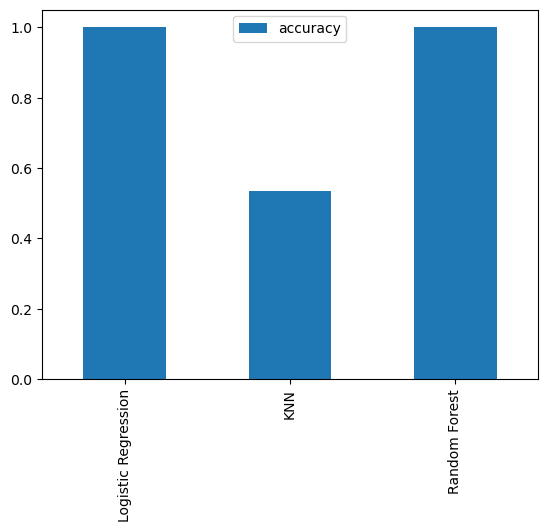

In [55]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [56]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [57]:
train_scores

[1.0,
 0.7604790419161677,
 0.7664670658682635,
 0.718562874251497,
 0.7155688622754491,
 0.7005988023952096,
 0.7125748502994012,
 0.7125748502994012,
 0.6976047904191617,
 0.6946107784431138,
 0.6916167664670658,
 0.6826347305389222,
 0.6766467065868264,
 0.6706586826347305,
 0.6706586826347305,
 0.6526946107784432,
 0.6586826347305389,
 0.6616766467065869,
 0.6646706586826348,
 0.6706586826347305]

In [58]:
test_scores

[0.5476190476190477,
 0.5357142857142857,
 0.5,
 0.5476190476190477,
 0.5357142857142857,
 0.5952380952380952,
 0.5595238095238095,
 0.6071428571428571,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.5952380952380952,
 0.5357142857142857,
 0.5476190476190477,
 0.5119047619047619,
 0.5595238095238095,
 0.5595238095238095,
 0.5714285714285714,
 0.5595238095238095,
 0.5595238095238095]

Maximum KNN score on the test data: 60.71%


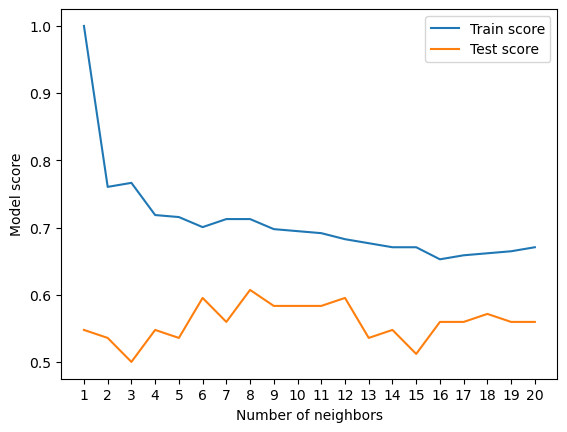

In [59]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [60]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [61]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [63]:
rs_log_reg.score(X_test, y_test)

1.0

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [64]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [65]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [66]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and check them again using GridSearchCV...

In [67]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [68]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [69]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

1.0

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [70]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [71]:
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [72]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64

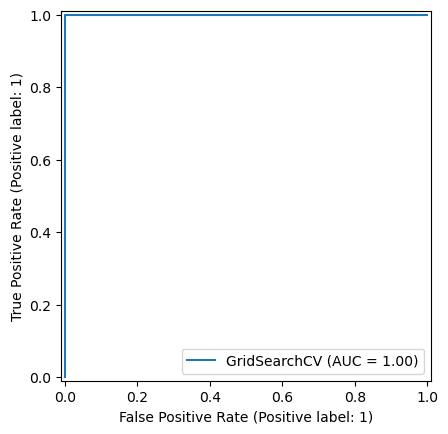

In [73]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [74]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[50  0]
 [ 0 34]]


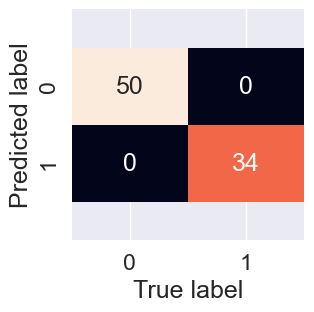

In [75]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [76]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [77]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [78]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver="liblinear")

In [79]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([1., 1., 1., 1., 1.])

In [80]:
cv_acc = np.mean(cv_acc)
cv_acc

1.0

In [81]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

1.0

In [82]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

1.0

In [83]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

1.0

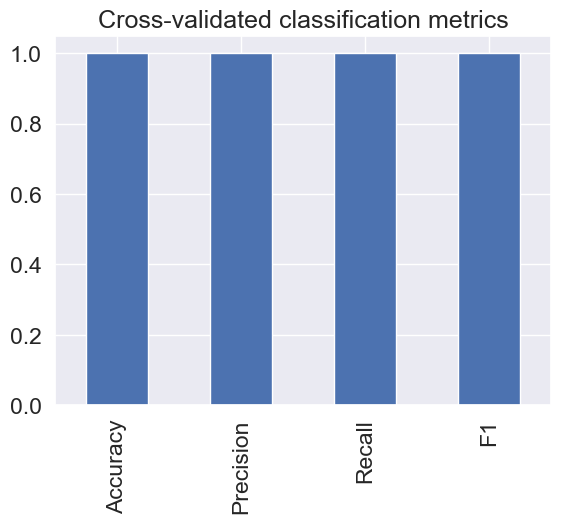

In [84]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

In [85]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.1082636733874054,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [86]:
# Check coef_
clf.coef_

array([[ 6.55322371e-04, -7.08085990e-03, -2.99118055e+00,
         2.42548917e-03,  5.77549502e-02,  6.57775616e-02,
         1.28670635e-03,  2.75106127e-03,  5.01617535e-03,
        -3.92974558e-02, -8.50111958e-02, -1.29325747e-02,
         0.00000000e+00, -4.67024320e-02,  0.00000000e+00]])

In [87]:
nd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,0,3,1,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,1,3,0,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,0,2,1,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,0,3,1,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,1,3,0,22.0,1,1,139,12.2875,0,3,False,False,False,True,False


In [88]:
# Match coef's of features to columns
feature_dict = dict(zip(nd.columns, list(clf.coef_[0])))
feature_dict

{'PassengerId': 0.0006553223710999049,
 'Survived': -0.007080859904256151,
 'Pclass': -2.9911805532628915,
 'Sex': 0.0024254891669899057,
 'Age': 0.057754950215285296,
 'SibSp': 0.06577756155889472,
 'Parch': 0.0012867063530613732,
 'Ticket': 0.002751061267272363,
 'Fare': 0.005016175354933712,
 'Cabin': -0.039297455751709474,
 'Embarked': -0.08501119583513303,
 'Age_is_missing': -0.012932574695695257,
 'Fare_is_missing': 0.0,
 'Ticket_is_missing': -0.046702432017555986,
 'Cabin_is_missing': 0.0}

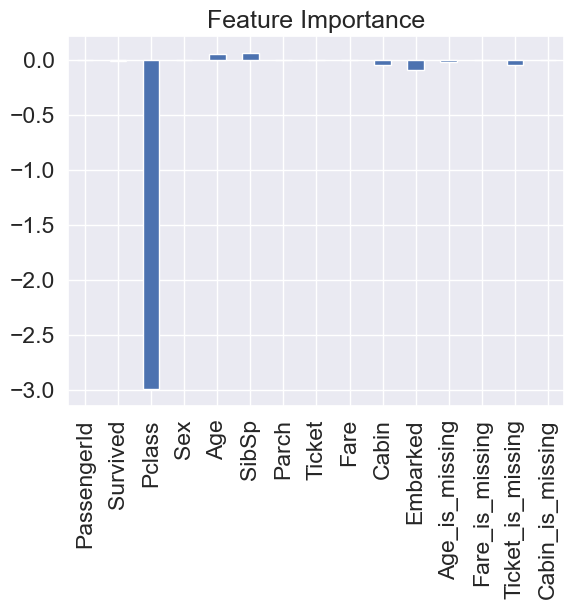

In [89]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [90]:
pd.crosstab(df["Pclass"], df["Survived"])

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


## 5. Saving and loading trained machine learning models

With Python's `pickle` module


**Pickle**

In [91]:
import pickle

# Save an extisting model to file
pickle.dump(clf, open("tsp_logistic_regression_model_1.pkl", "wb"))

In [92]:
# Load a saved model
loaded_pickle_model = pickle.load(open("tsp_logistic_regression_model_1.pkl", "rb"))

In [93]:
loaded_pickle_model.score(X_test,y_test)

1.0

In [94]:
score = loaded_pickle_model.score(X_test,y_test)
print(f"Model Score: {score}")

Model Score: 1.0
